### 2.1데이터수집

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
train = pd.read_csv('train.csv') # 훈련용(문제,답)
test = pd.read_csv('test.csv') # 평가용
submission = pd.read_csv('sample_submission.csv') # 업로드 양식

In [75]:
train.shape, test.shape

((29305, 16), (19537, 15))

### 2.2수치형 컬럼 선택

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


### 데이터 전처리

In [77]:
# 컬럼의 띄어쓰기 삭제
for i in ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']:
    train[i]=train[i].str.strip()
    test[i]=test[i].str.strip()
for i in test.columns:
    print(test[i].unique())

[29306 29307 29308 ... 48840 48841 48842]
[18 29 45 42 41 17 34 22 35 36 40 81 21 26 24 33 27 55 49 52 60 51 48 25
 19 31 44 61 72 23 39 71 47 43 58 38 62 80 28 68 30 59 20 32 53 66 63 79
 54 65 37 46 50 64 78 57 56 67 90 73 69 75 70 76 77 74 88 82 84 87 89 83
 85]
['?' 'Private' 'Self-emp-not-inc' 'Local-gov' 'Self-emp-inc' 'State-gov'
 'Federal-gov' 'Without-pay' 'Never-worked']
[245274  83003  35136 ... 117473 150817 341632]
['Some-college' 'HS-grad' 'Bachelors' 'Doctorate' '10th' 'Assoc-voc'
 'Masters' '7th-8th' '9th' '11th' 'Prof-school' 'Assoc-acdm' '5th-6th'
 '12th' '1st-4th' 'Preschool']
[10  9 13 16  6 11 14  4  5  7 15 12  3  8  2  1]
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['?' 'Other-service' 'Tech-support' 'Exec-managerial' 'Farming-fishing'
 'Sales' 'Adm-clerical' 'Craft-repair' 'Handlers-cleaners'
 'Machine-op-inspct' 'Protective-serv' 'Prof-specialty' 'Transport-moving'
 'Priv-house-serv' 'Arme

In [78]:
# 중복 컬럼 제거
train.drop('education', axis = 1, inplace = True)
test.drop('education', axis = 1, inplace = True)

In [79]:
train['hours-per-week'].value_counts()

40    13652
50     2554
45     1647
60     1352
35     1154
      ...  
97        1
73        1
82        1
94        1
69        1
Name: hours-per-week, Length: 93, dtype: int64

In [80]:
train['marital-status'].value_counts()

Married-civ-spouse       13331
Never-married             9673
Divorced                  4030
Widowed                    942
Separated                  914
Married-spouse-absent      394
Married-AF-spouse           21
Name: marital-status, dtype: int64

In [81]:
#  트레인 결측치 대체
train['workclass'].replace('?','Private', inplace = True)
train['native-country'].replace('?','United-States', inplace = True)
train['occupation'].replace('?','Prof-specialty', inplace = True)

In [82]:
train['marital-status'].value_counts()

Married-civ-spouse       13331
Never-married             9673
Divorced                  4030
Widowed                    942
Separated                  914
Married-spouse-absent      394
Married-AF-spouse           21
Name: marital-status, dtype: int64

In [83]:
# marital-status 라벨인코딩
from sklearn.preprocessing import LabelEncoder

In [84]:
train['marital-status']=train['marital-status'].map({'Married-civ-spouse':0,'Never-married':1,'Divorced':2,'Widowed':3,
                                                    'Separated':4,'Married-spouse-absent':5,'Married-AF-spouse':6})

In [85]:
test['marital-status']=test['marital-status'].map({'Married-civ-spouse':0,'Never-married':1,'Divorced':2,'Widowed':3,
                                                    'Separated':4,'Married-spouse-absent':5,'Married-AF-spouse':6})

In [86]:
train.corr()

,no,age,fnlwgt,education-num,marital-status,capital-gain,capital-loss,hours-per-week,income
no,1.000000,0.001111,0.002347,-0.008466,0.006706,0.003916,0.003246,0.003166,-0.004080
age,0.001111,1.000000,-0.075753,0.035084,-0.000616,0.078498,0.054413,0.073100,0.238460
fnlwgt,0.002347,-0.075753,1.000000,-0.030600,0.010981,-0.005051,-0.001513,-0.010154,-0.002994
education-num,-0.008466,0.035084,-0.030600,1.000000,-0.100575,0.127651,0.083925,0.147569,0.331798
marital-status,0.006706,-0.000616,0.010981,-0.100575,1.000000,-0.052621,-0.052832,-0.130209,-0.311211
capital-gain,0.003916,0.078498,-0.005051,0.127651,-0.052621,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.003246,0.054413,-0.001513,0.083925,-0.052832,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.003166,0.073100,-0.010154,0.147569,-0.130209,0.088609,0.055271,1.000000,0.231045
income,-0.004080,0.238460,-0.002994,0.331798,-0.311211,0.221387,0.135645,0.231045,1.000000


In [87]:
train['marital-status'].value_counts()

0    13331
1     9673
2     4030
3      942
4      914
5      394
6       21
Name: marital-status, dtype: int64

In [88]:
# 테스트 결측치 대체
test['workclass'].replace('?','Private', inplace = True)
test['native-country'].replace('?','United-States', inplace = True)
test['occupation'].replace('?','Prof-specialty', inplace = True)

In [89]:
train['capital-gain'].value_counts()

0        26883
15024      300
7688       240
7298       204
99999      148
         ...  
2993         1
6612         1
3456         1
6097         1
22040        1
Name: capital-gain, Length: 117, dtype: int64

In [90]:
# 컬럼 합치기 (capital-gain, capital-loss) = (capital)
train['capital'] = train['capital-gain'] - train['capital-loss']
test['capital'] = test['capital-gain'] - test['capital-loss']

In [91]:
# 사용하지 않을 컬럼 정리
train.drop(['capital-gain','capital-loss'], axis=1, inplace=True)
test.drop(['capital-gain','capital-loss'], axis=1, inplace=True)

In [92]:
train['native-country'].value_counts()

United-States                 26796
Mexico                          579
Philippines                     178
Germany                         124
Puerto-Rico                     117
Canada                          111
El-Salvador                      96
Cuba                             94
India                            90
England                          75
South                            74
China                            68
Jamaica                          68
Dominican-Republic               61
Italy                            60
Japan                            54
Columbia                         53
Poland                           53
Guatemala                        51
Haiti                            51
Vietnam                          50
Portugal                         43
Taiwan                           39
Iran                             38
Nicaragua                        28
Greece                           25
Peru                             25
Ireland                     

In [93]:
for i in train['native-country']:
    if i != 'United-States' and i != 'Mexico' and i != 'Philippines' and i != 'Germany' :
        train['native-country'].replace(i,'other', inplace = True)
for i in test['native-country']:
    if i != 'United-States' and i != 'Mexico' and i != 'Philippines' and i != 'Germany' :
        test['native-country'].replace(i,'other', inplace = True)

In [94]:
for i in train['age']:
    if i <= 20 :
        train['age'].replace(i,'0', inplace = True)
    elif i <= 30 :
         train['age'].replace(i,'1', inplace = True)
    elif i <= 40 :
        train['age'].replace(i,'2', inplace = True)
    elif i <= 50 :
        train['age'].replace(i,'3', inplace = True)
    elif i <= 60 :
         train['age'].replace(i,'4', inplace = True)
    elif i <= 70 :
         train['age'].replace(i,'5', inplace = True)
    elif i <= 80 :
         train['age'].replace(i,'6', inplace = True)
    elif i <= 90 :
         train['age'].replace(i,'7', inplace = True)

In [95]:
for i in test['age']:
    if i <= 20 :
        test['age'].replace(i,'0', inplace = True)
    elif i <= 30 :
         test['age'].replace(i,'1', inplace = True)
    elif i <= 40 :
        test['age'].replace(i,'2', inplace = True)
    elif i <= 50 :
        test['age'].replace(i,'3', inplace = True)
    elif i <= 60 :
         test['age'].replace(i,'4', inplace = True)
    elif i <= 70 :
         test['age'].replace(i,'5', inplace = True)
    elif i <= 80 :
         test['age'].replace(i,'6', inplace = True)
    elif i <= 90 :
         test['age'].replace(i,'7', inplace = True)

In [96]:
train['age']=train['age'].map({'0':0,'1':1,'2':2,'3':3,
                            '4':4,'5':5,'6':6,'7':7,})
test['age']=test['age'].map({'0':0,'1':1,'2':2,'3':3,
                            '4':4,'5':5,'6':6,'7':7,})

In [97]:
train['age'].value_counts()

2    7750
1    7286
3    6194
4    3725
0    2162
5    1655
6     446
7      87
Name: age, dtype: int64

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  int64 
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  hours-per-week  29305 non-null  int64 
 11  native-country  29305 non-null  object
 12  income          29305 non-null  int64 
 13  capital         29305 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 3.1+ MB


In [99]:
train['workclass'].value_counts()

Private             22073
Self-emp-not-inc     2305
Local-gov            1868
State-gov            1201
Self-emp-inc          987
Federal-gov           854
Without-pay            12
Never-worked            5
Name: workclass, dtype: int64

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
train['workclass'].replace('Without-pay','nopay', inplace = True)
train['workclass'].replace('Never-worked','nopay', inplace = True)
test['workclass'].replace('Without-pay','nopay', inplace = True)
test['workclass'].replace('Never-worked','nopay', inplace = True)

<AxesSubplot:xlabel='workclass', ylabel='count'>

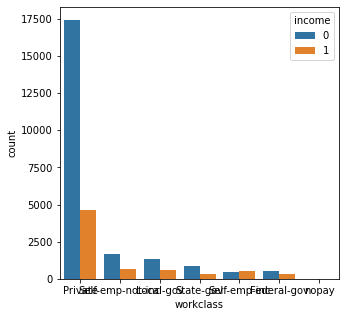

In [102]:
plt.figure(figsize = (5,5))
sns.countplot(data = train,
             x = 'workclass',
             hue='income')

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  int64 
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  hours-per-week  29305 non-null  int64 
 11  native-country  29305 non-null  object
 12  income          29305 non-null  int64 
 13  capital         29305 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 3.1+ MB


In [104]:
train['workclass']=train['workclass'].map({'Private':0,'Self-emp-not-inc':1,'Local-gov':2,'State-gov':3,
                            'Self-emp-inc':4,'Federal-gov':5,'nopay':6})
test['workclass']=test['workclass'].map({'Private':0,'Self-emp-not-inc':1,'Local-gov':2,'State-gov':3,
                            'Self-emp-inc':4,'Federal-gov':5,'nopay':6})

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  int64 
 3   fnlwgt          29305 non-null  int64 
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  int64 
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  hours-per-week  29305 non-null  int64 
 11  native-country  29305 non-null  object
 12  income          29305 non-null  int64 
 13  capital         29305 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 3.1+ MB


<AxesSubplot:xlabel='relationship', ylabel='count'>

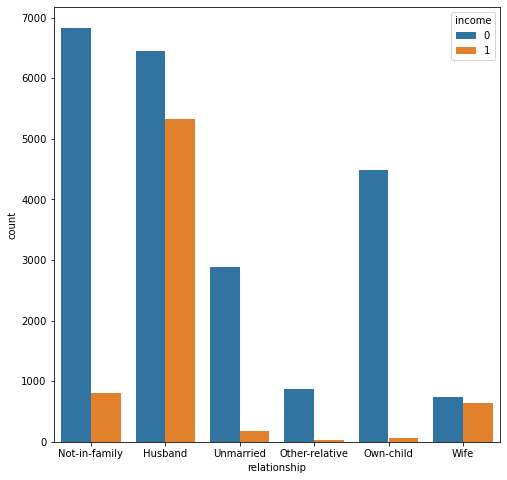

In [106]:
plt.figure(figsize = (8,8))
sns.countplot(data = train,
             x = 'relationship',
             hue='income')

In [107]:
train['relationship'].unique()

array(['Not-in-family', 'Husband', 'Unmarried', 'Other-relative',
       'Own-child', 'Wife'], dtype=object)

In [108]:
train['relationship']=train['relationship'].map({'Not-in-family':0,'Husband':1,'Unmarried':2,'Other-relative':2,
                            'Own-child':2,'Wife':3})

In [109]:
test['relationship']=test['relationship'].map({'Not-in-family':0,'Husband':1,'Unmarried':2,'Other-relative':2,
                            'Own-child':2,'Wife':3})

In [110]:
train['relationship'].value_counts()

1    11769
2     8529
0     7637
3     1370
Name: relationship, dtype: int64

<AxesSubplot:xlabel='occupation', ylabel='count'>

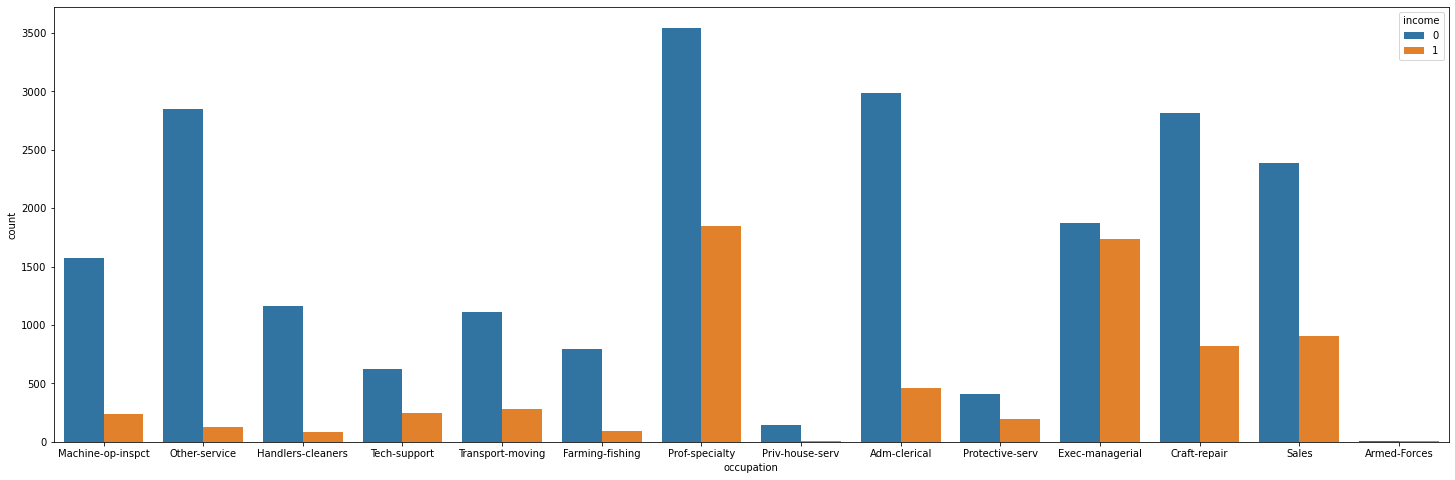

In [111]:
plt.figure(figsize = (25,8))
plt.xticks(fontsize=10)
sns.countplot(data = train,
             x = 'occupation',
             hue='income')

In [112]:
train['occupation'].value_counts()

Prof-specialty       5392
Craft-repair         3632
Exec-managerial      3609
Adm-clerical         3440
Sales                3292
Other-service        2975
Machine-op-inspct    1811
Transport-moving     1393
Handlers-cleaners    1249
Farming-fishing       888
Tech-support          865
Protective-serv       603
Priv-house-serv       146
Armed-Forces           10
Name: occupation, dtype: int64

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  int64 
 3   fnlwgt          29305 non-null  int64 
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  int64 
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  int64 
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  hours-per-week  29305 non-null  int64 
 11  native-country  29305 non-null  object
 12  income          29305 non-null  int64 
 13  capital         29305 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 3.1+ MB


In [114]:
train['occupation']=train['occupation'].map({'Machine-op-inspct':0,'Other-service':0,'Handlers-cleaners':0,'Farming-fishing':0,
                            'Tech-support':1,'Transport-moving':1,'Prof-specialty':2,'Priv-house-serv':0,'Adm-clerical':3,'Protective-serv':4,'Exec-managerial':5,'Craft-repair':6,"Sales":7,'Armed-Forces':7})
test['occupation']=test['occupation'].map({'Machine-op-inspct':0,'Other-service':0,'Handlers-cleaners':0,'Farming-fishing':0,
                            'Tech-support':1,'Transport-moving':1,'Prof-specialty':2,'Priv-house-serv':0,'Adm-clerical':3,'Protective-serv':4,'Exec-managerial':5,'Craft-repair':6,"Sales":7,'Armed-Forces':7})

In [115]:
train['occupation'].value_counts()

0    7069
2    5392
6    3632
5    3609
3    3440
7    3302
1    2258
4     603
Name: occupation, dtype: int64

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  int64 
 3   fnlwgt          29305 non-null  int64 
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  int64 
 6   occupation      29305 non-null  int64 
 7   relationship    29305 non-null  int64 
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  hours-per-week  29305 non-null  int64 
 11  native-country  29305 non-null  object
 12  income          29305 non-null  int64 
 13  capital         29305 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.1+ MB


In [117]:
train['race'].value_counts()

White                 25081
Black                  2776
Asian-Pac-Islander      919
Amer-Indian-Eskimo      290
Other                   239
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

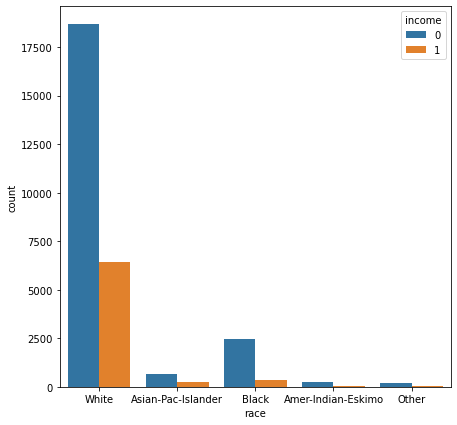

In [118]:
plt.figure(figsize = (7,7))
plt.xticks(fontsize=10)
sns.countplot(data = train,
             x = 'race',
             hue='income')

In [119]:
train['race']=train['race'].map({'White':0,'Black':1,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':3,
                            'Other':4})
test['race']=test['race'].map({'White':0,'Black':1,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':3,
                            'Other':4})

In [120]:
train['race'].value_counts()

0    25081
1     2776
2      919
3      290
4      239
Name: race, dtype: int64

In [121]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  int64 
 3   fnlwgt          29305 non-null  int64 
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  int64 
 6   occupation      29305 non-null  int64 
 7   relationship    29305 non-null  int64 
 8   race            29305 non-null  int64 
 9   sex             29305 non-null  object
 10  hours-per-week  29305 non-null  int64 
 11  native-country  29305 non-null  object
 12  income          29305 non-null  int64 
 13  capital         29305 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 3.1+ MB


In [122]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              19537 non-null  int64 
 1   age             19537 non-null  int64 
 2   workclass       19537 non-null  int64 
 3   fnlwgt          19537 non-null  int64 
 4   education-num   19537 non-null  int64 
 5   marital-status  19537 non-null  int64 
 6   occupation      19537 non-null  int64 
 7   relationship    19537 non-null  int64 
 8   race            19537 non-null  int64 
 9   sex             19537 non-null  object
 10  hours-per-week  19537 non-null  int64 
 11  native-country  19537 non-null  object
 12  capital         19537 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.9+ MB


In [123]:
train['sex'].value_counts()

Male      19621
Female     9684
Name: sex, dtype: int64

In [124]:
train['sex']=train['sex'].map({'Male':0,'Female':1})
test['sex']=test['sex'].map({'Male':0,'Female':1})

In [125]:
train['sex'].value_counts()

0    19621
1     9684
Name: sex, dtype: int64

In [126]:
train['workclass'].value_counts()

0    22073
1     2305
2     1868
3     1201
4      987
5      854
6       17
Name: workclass, dtype: int64

In [127]:
train['native-country'].value_counts()

United-States    26796
other             1628
Mexico             579
Philippines        178
Germany            124
Name: native-country, dtype: int64

In [128]:
from sklearn.preprocessing import LabelEncoder
items=['United-States','other','Mexico','Philippines','Germany']
le = LabelEncoder()
le.fit(items)

LabelEncoder()

In [129]:
labels = le.transform(items)
print('인코딩 변환값 :',labels)

인코딩 변환값 : [3 4 1 2 0]


In [130]:
train['native-country'].value_counts()

United-States    26796
other             1628
Mexico             579
Philippines        178
Germany            124
Name: native-country, dtype: int64

In [131]:
train['native-country']=train['native-country'].map({'United-States':0,'other':1,'Mexico':2,'Philippines':3,
                                                    'Germany':4})
test['native-country']=test['native-country'].map({'United-States':0,'other':1,'Mexico':2,'Philippines':3,
                                                    'Germany':4})

In [132]:
test['native-country'].value_counts()

0    17893
1     1073
2      372
3      117
4       82
Name: native-country, dtype: int64

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   no              29305 non-null  int64
 1   age             29305 non-null  int64
 2   workclass       29305 non-null  int64
 3   fnlwgt          29305 non-null  int64
 4   education-num   29305 non-null  int64
 5   marital-status  29305 non-null  int64
 6   occupation      29305 non-null  int64
 7   relationship    29305 non-null  int64
 8   race            29305 non-null  int64
 9   sex             29305 non-null  int64
 10  hours-per-week  29305 non-null  int64
 11  native-country  29305 non-null  int64
 12  income          29305 non-null  int64
 13  capital         29305 non-null  int64
dtypes: int64(14)
memory usage: 3.1 MB


In [134]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   no              19537 non-null  int64
 1   age             19537 non-null  int64
 2   workclass       19537 non-null  int64
 3   fnlwgt          19537 non-null  int64
 4   education-num   19537 non-null  int64
 5   marital-status  19537 non-null  int64
 6   occupation      19537 non-null  int64
 7   relationship    19537 non-null  int64
 8   race            19537 non-null  int64
 9   sex             19537 non-null  int64
 10  hours-per-week  19537 non-null  int64
 11  native-country  19537 non-null  int64
 12  capital         19537 non-null  int64
dtypes: int64(13)
memory usage: 1.9 MB


In [144]:
train['workclass'].value_counts()

0    22073
1     2305
2     1868
3     1201
4      987
5      854
6       17
Name: workclass, dtype: int64

In [136]:
#feature_names=['no','age','workclass','fnlwgt','education','education-num',
 #                     'marital-status','occupation','relationship','race','sex',
  #                   'capital-gain','capital-loss','hours-per-week','native-country','income']

In [147]:
X_train = train.drop(['income'], axis=1) # 수치형 데이터만 문제로 추출
y_train = train['income']

In [149]:
X_train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'capital'],
      dtype='object')

In [160]:
X_train.drop(['no','fnlwgt'], axis=1, inplace=True)
X_test=test.drop(['no','fnlwgt'], axis=1)


### x,y 나누기

In [161]:
X_train.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital
0,1,0,7,2,0,0,0,0,40,0,0
1,2,0,10,2,0,0,0,1,55,0,-1721
2,2,0,13,1,0,0,2,1,50,1,0
3,5,0,11,2,1,0,0,1,40,0,0
4,1,0,10,0,1,1,0,0,70,0,0


### 4.모델 선택 및 학습하기

In [162]:
from sklearn.linear_model import LogisticRegression #분류 선형모델

In [163]:
logi_model = LogisticRegression()

In [164]:
logi_model.fit(X_train,y_train)

C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 5.예측 결과 업로드

In [155]:
X_test =test #평가용 데이터셋 구축

In [165]:
logi_pre = logi_model.predict(X_test)
logi_pre

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [166]:
submission['income']=logi_pre #예측 결과를 양식에 넣기

In [168]:
submission.to_csv('myFirstSubmission3.csv', index=False)